In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()


Saving TelecomX_Data.json to TelecomX_Data.json


In [3]:
import pandas as pd
df = pd.read_json("TelecomX_Data.json")
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df.shape

(7267, 6)

In [5]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [8]:
import pandas as pd

In [9]:
customer_df = pd.json_normalize(df['customer'].apply(eval))

TypeError: eval() arg 1 must be a string, bytes or code object

In [10]:
customer_df = pd.json_normalize(df['customer'].apply(eval))

TypeError: eval() arg 1 must be a string, bytes or code object

In [11]:
import pandas as pd
import ast
import json

def parse_obj(x):
    if pd.isna(x):
        return {}
    if isinstance(x, dict):
        return x
    if isinstance(x, str):
        # tenta interpretar string de dict/JSON com segurança
        try:
            return ast.literal_eval(x)
        except Exception:
            try:
                return json.loads(x)
            except Exception:
                return {}
    return {}

customer_df = pd.json_normalize(df['customer'].map(parse_obj)).add_prefix('customer_')
phone_df    = pd.json_normalize(df['phone'].map(parse_obj)).add_prefix('phone_')
internet_df = pd.json_normalize(df['internet'].map(parse_obj)).add_prefix('internet_')
account_df  = pd.json_normalize(df['account'].map(parse_obj)).add_prefix('account_')

df_expanded = pd.concat(
    [df[['customerID','Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)

df_expanded.head()
df_expanded.shape

(7267, 21)

In [12]:
# Visão geral
df_expanded.info()

# Distribuição do alvo (churn)
df_expanded['Churn'].value_counts(dropna=False)

# Nulos por coluna (ordem decrescente)
df_expanded.isna().sum().sort_values(ascending=False)

# Quais colunas são object vs numéricas
df_expanded.dtypes.value_counts()

# Conferir todos os nomes de colunas
df_expanded.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

['customerID',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges.Monthly',
 'account_Charges.Total']

In [13]:
# Remove espaços extras
df_expanded = df_expanded.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Converte Churn para binário (Yes=1, No=0)
df_expanded['Churn'] = df_expanded['Churn'].map({'Yes': 1, 'No': 0})

# Converte 'account_Charges.Total' para número
df_expanded['account_Charges.Total'] = (
    df_expanded['account_Charges.Total']
    .replace(' ', '0')  # se tiver espaços
    .replace('', '0')   # se tiver strings vazias
    .replace({'NaN': '0'})  # se vier escrito NaN como string
    .astype(float)
)

# Confere o resultado
df_expanded.info()
df_expanded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

/tmp/ipython-input-2072413603.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_expanded = df_expanded.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


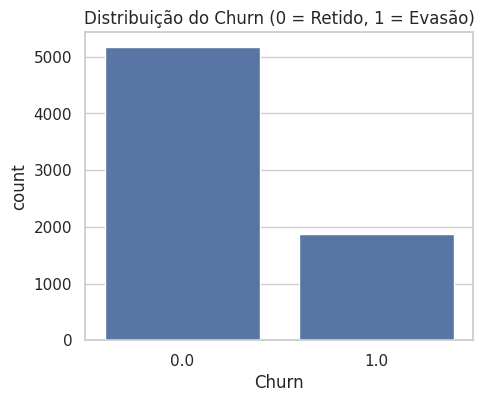

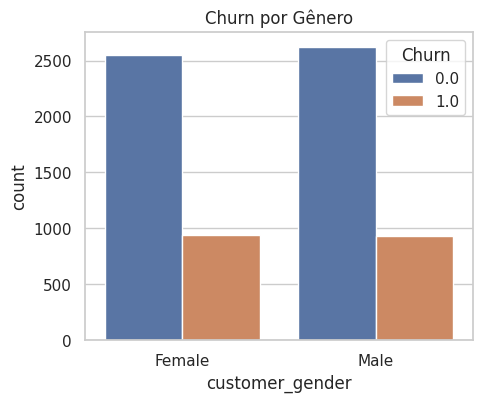

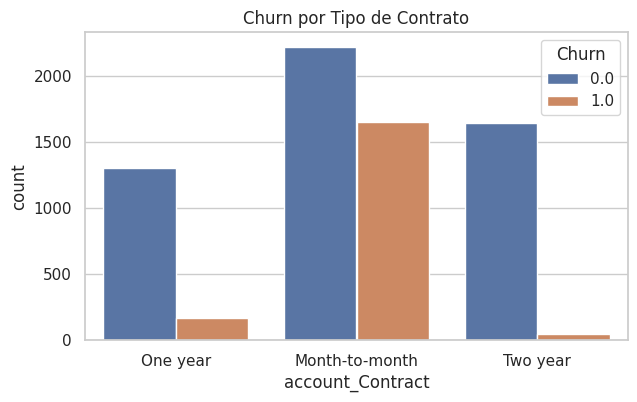

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo de gráficos
sns.set(style="whitegrid")

# Distribuição do Churn
plt.figure(figsize=(5,4))
sns.countplot(data=df_expanded, x='Churn')
plt.title("Distribuição do Churn (0 = Retido, 1 = Evasão)")
plt.show()

# Frequência por gênero
plt.figure(figsize=(5,4))
sns.countplot(data=df_expanded, x='customer_gender', hue='Churn')
plt.title("Churn por Gênero")
plt.show()

# Contrato vs Churn
plt.figure(figsize=(7,4))
sns.countplot(data=df_expanded, x='account_Contract', hue='Churn')
plt.title("Churn por Tipo de Contrato")
plt.show()

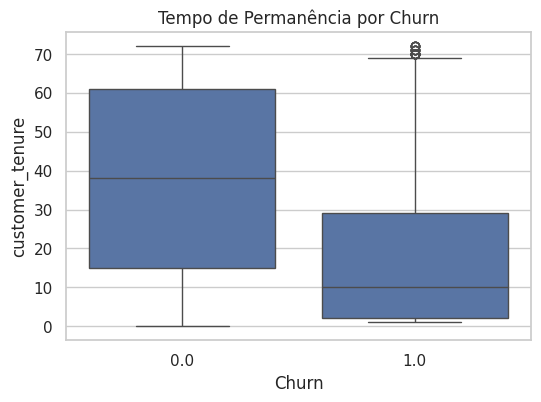

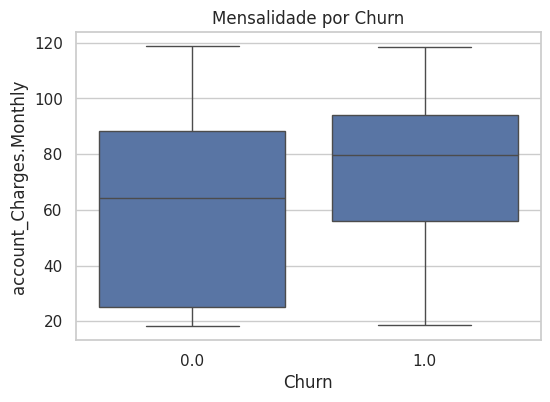

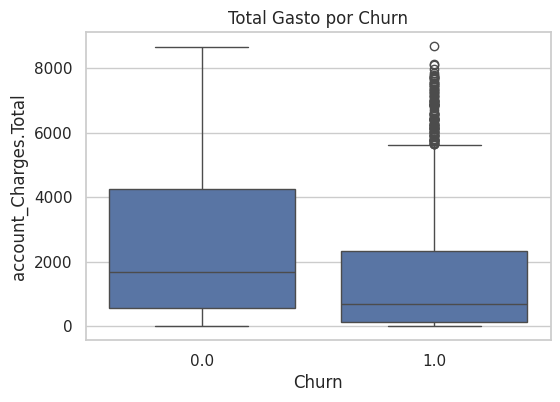

In [15]:
# Tempo de permanência vs churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df_expanded, x='Churn', y='customer_tenure')
plt.title("Tempo de Permanência por Churn")
plt.show()

# Mensalidade vs churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df_expanded, x='Churn', y='account_Charges.Monthly')
plt.title("Mensalidade por Churn")
plt.show()

# Total gasto vs churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df_expanded, x='Churn', y='account_Charges.Total')
plt.title("Total Gasto por Churn")
plt.show()

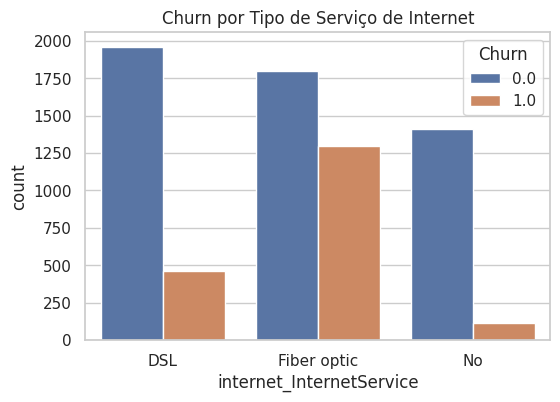

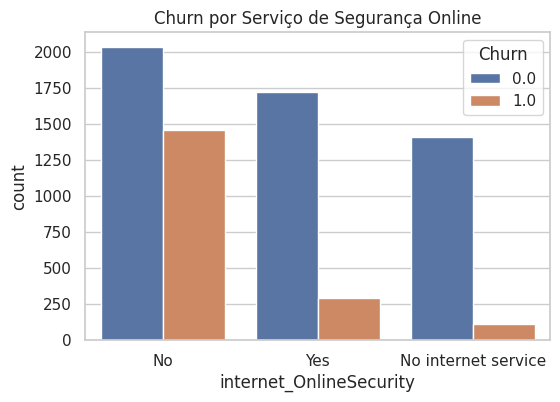

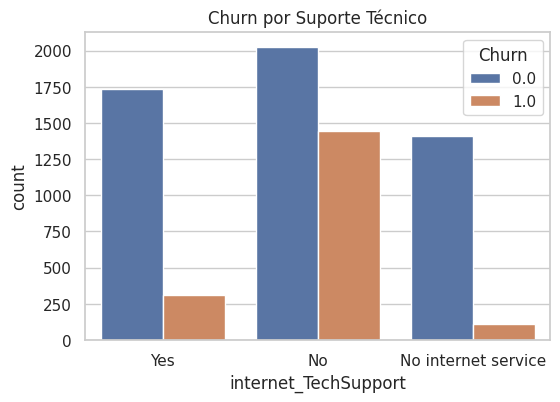

In [16]:
# Internet service vs churn
plt.figure(figsize=(6,4))
sns.countplot(data=df_expanded, x='internet_InternetService', hue='Churn')
plt.title("Churn por Tipo de Serviço de Internet")
plt.show()

# Online Security vs churn
plt.figure(figsize=(6,4))
sns.countplot(data=df_expanded, x='internet_OnlineSecurity', hue='Churn')
plt.title("Churn por Serviço de Segurança Online")
plt.show()

# Tech Support vs churn
plt.figure(figsize=(6,4))
sns.countplot(data=df_expanded, x='internet_TechSupport', hue='Churn')
plt.title("Churn por Suporte Técnico")
plt.show()